In [1]:
from figures.lif_demos import single_neuron_driven_by_external_current_pulses as fig_s1
from figures.lif_demos import two_neuron_ei_circuit as fig_s2
from figures.lif_demos import three_neuron_eei_circuit as fig_s3
from figures.lif_demos import multineuron_chain_ei_circuit as fig_s4
from figures.lif_demos import self_sustaining_excitation_among_e_cells as fig_s5
from figures.lif_demos import hyperexcitable_downstream_neurons_via_input_barrage as fig_s6
from figures.lif_demos import hyperexcitable_downstream_neuron_via_self_sustaining_input as fig_s7
%matplotlib inline

Consider a network of leaky integrate-and-fire neurons, where the $i$th neuron obeys:

$$\tau \cfrac{\Delta v_i}{\Delta t} = (v_{rest} - v_i) + \sum\limits_s g_i^s (t) (v^s_{rev} - v_i)$$

with $s$ indexing synapse type and conductances $g_i^s$ governed by

$$\tau_s \cfrac{\Delta g^s_i}{\Delta t} = -g^s_i + \cfrac{\tau_s}{\Delta t}\left(d^s_i(t) + 
\sum_j W^s_{ij} spike_j(t) \right).$$

If the neuron's voltage $v_i$ becomes greater than its threshold $v^{th}$ at time $t$, then we set

$$spike_i(t) = 1$$

with $spike_i(t)$ otherwise being zero. After a neuron spikes its voltage is held at $v_{reset}$ for the duration of its refractory period $t_{rp}$.

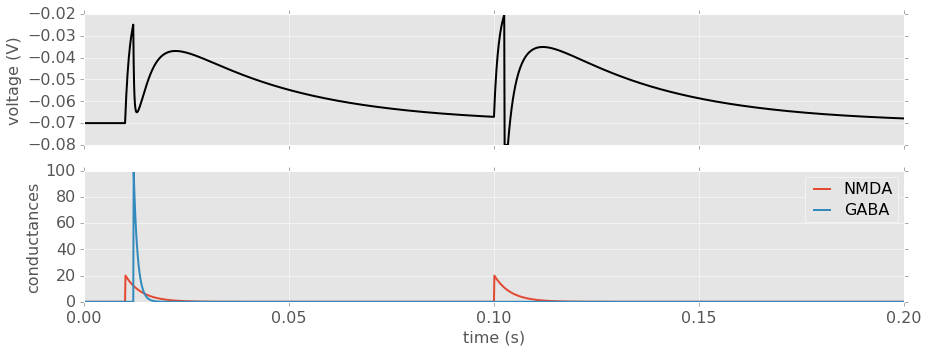

In [2]:
f = fig_s1(
    SEED=0, V_REST=-0.07, TAU_M=0.03, V_TH=-0.02, V_RESET=-0.08, REFRAC_PER=0.001,
    TAUS_SYN={'nmda': 0.004, 'gaba': 0.001}, V_REVS_SYN={'nmda': 0.0, 'gaba': -0.08},
    DRIVE_STRENGTHS={'nmda': 20, 'gaba': 100}, DRIVE_TIMES={'nmda': [0.01, .1], 'gaba': [0.012]},
    SIM_DURATION=.2, DT=0.0001,
    FIG_SIZE=(13, 5), FONT_SIZE=16,
)

### Fig S1: Single neuron response to slow NMDA input followed by fast GABA input

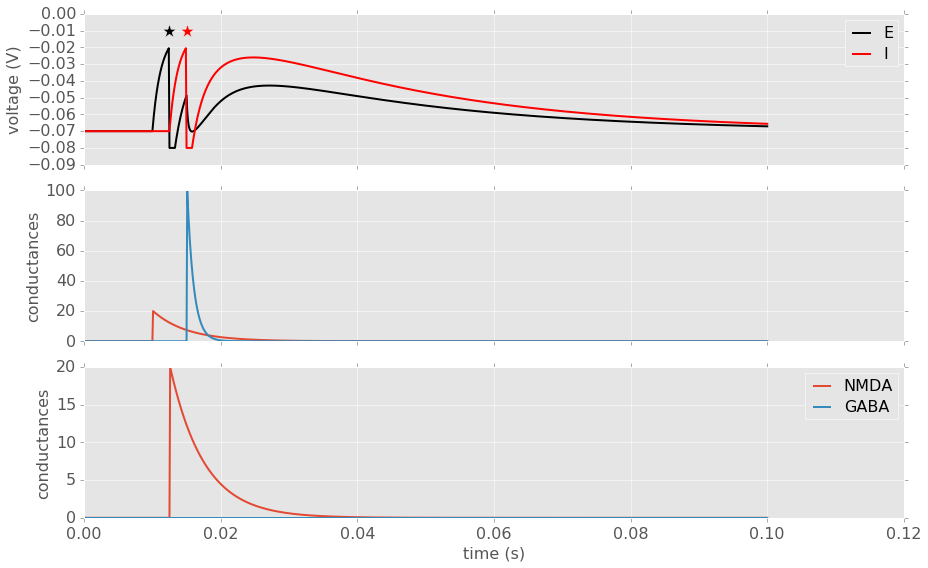

In [3]:
f = fig_s2(
    SEED=0, V_REST=-0.07, TAU_M=0.03, V_TH=-0.02, V_RESET=-0.08, REFRAC_PER=0.001,
    TAUS_SYN={'nmda': 0.005, 'gaba': 0.001}, V_REVS_SYN={'nmda': 0.0, 'gaba': -0.08},
    W_EI={'nmda': 0, 'gaba': 100}, W_IE={'nmda': 20, 'gaba': 0}, W_II={'nmda':0, 'gaba': 0},
    DRIVE_STRENGTHS={'nmda': 20, 'gaba': 0},
    DRIVE_TIMES={'nmda': [0.01], 'gaba': [0.013]},
    SIM_DURATION=.1, DT=0.0001,
    FIG_SIZE=(13, 8), FONT_SIZE=16, COLORS=['k', 'r'],
)

#### Fig S2: Response of coupled E and I neurons
This shows that in the situation that E projects to I and I projects back to E, a spike elicited in E can cause a spike in I, which then inhibits E again.

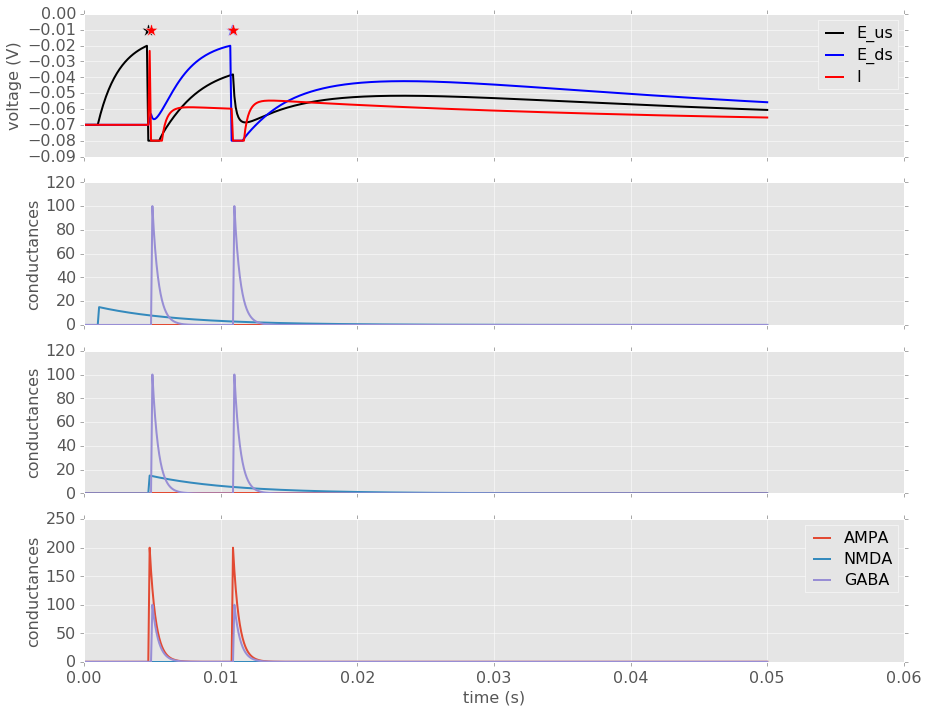

In [4]:
f = fig_s3(
    SEED=0, V_REST=-0.07, TAU_M=0.03, V_TH=-0.02, V_RESET=-0.08, REFRAC_PER=0.001,
    TAUS_SYN={'nmda': 0.006, 'ampa': .0005, 'gaba': 0.0005},
    V_REVS_SYN={'nmda': 0.0, 'ampa': 0.0, 'gaba': -0.08},
    W_EE={'nmda': 15, 'ampa': 0, 'gaba': 0}, W_EI={'nmda': 0, 'ampa': 0, 'gaba': 100},
    W_IE={'nmda': 0, 'ampa': 200, 'gaba': 0}, W_II={'nmda':0, 'ampa': 0, 'gaba': 100},
    DRIVE_STRENGTHS={'nmda': 15, 'ampa': 0, 'gaba': 0},
    DRIVE_TIMES={'nmda': [.001], 'ampa': [], 'gaba': []},
    SIM_DURATION=.05, DT=0.0001,
    FIG_SIZE=(13, 10), FONT_SIZE=16, COLORS=['k', 'b', 'r'],
)

### Fig S3: Two directionally coupled E neurons with one I neuron
This shows that with connectivity such that $E_1$ projects to $E_2$ (but not the other way around), and with both $E$ neurons projecting to and receiving projections from $I$, with $I$ also inhibiting itself, we have the case that $E_1$ firing causes $I$ to fire, which inhibits both $E_1$ and $E_2$, but after $I$ has fired, $E_2$ recovers to a significantly higher potential than $E_1$. Thus, in this network configuration, after one neuron fires and triggers inhibition, its downstream neighbors will be closer to threshold than it.

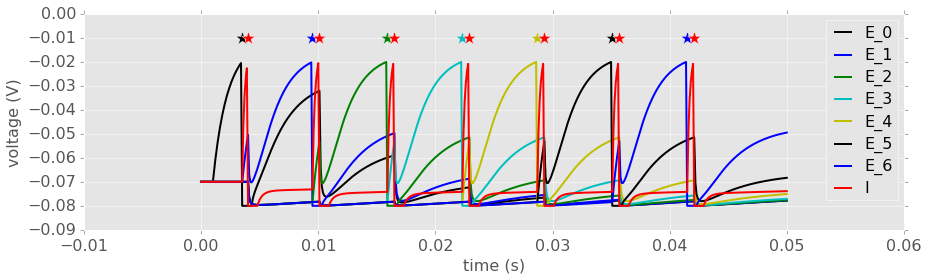

In [5]:
f = fig_s4(
    SEED=0, V_REST=-0.07, TAU_M=0.03, V_TH=-0.02, V_RESET=-0.08, REFRAC_PER=0.001,
    TAUS_SYN={'nmda': 0.005, 'ampa': .0005, 'gaba': 0.0005},
    V_REVS_SYN={'nmda': 0.0, 'ampa': 0.0, 'gaba': -0.08},
    N_E_NEURONS=7,
    W_EE={'nmda': 20, 'ampa': 0, 'gaba': 0}, W_EI={'nmda': 0, 'ampa': 0, 'gaba': 200},
    W_IE={'nmda': 0, 'ampa': 100, 'gaba': 0}, W_II={'nmda':0, 'ampa': 0, 'gaba': 100},
    DRIVE_STRENGTHS={'nmda': 20, 'ampa': 0, 'gaba': 0},
    DRIVE_TIMES={'nmda': [.001], 'ampa': [], 'gaba': []},
    SIM_DURATION=.05, DT=0.0001,
    FIG_SIZE=(13, 4), FONT_SIZE=16, COLORS=['k', 'b', 'g', 'c', 'y', 'k', 'b', 'r'],
)

### Fig S4: Propagation of spikes through a chain
This shows how spikes can propagate along a chain of connected excitatory neurons.

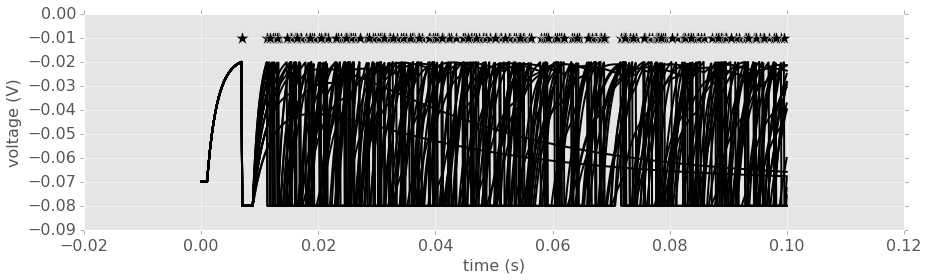

In [6]:
f = fig_s5(
    SEED=0, V_REST=-0.07, TAU_M=0.03, V_TH=-0.02, V_RESET=-0.08, REFRAC_PER=0.002,
    TAUS_SYN={'nmda': 0.005, 'ampa': .0005, 'gaba': 0.0005},
    V_REVS_SYN={'nmda': 0.0, 'ampa': 0.0, 'gaba': -0.08},
    N_NEURONS=20,
    W_EE={'nmda': 4, 'ampa': 0, 'gaba': 0}, P_CONNECT={'nmda': .2, 'ampa': 0, 'gaba': 0},
    DRIVE_STRENGTHS={'nmda': 13, 'ampa': 0, 'gaba': 0},
    DRIVE_TIMES={'nmda': [.001], 'ampa': [], 'gaba': []},
    SIM_DURATION=.1, DT=0.0001,
    FIG_SIZE=(13, 4), FONT_SIZE=16,
)

### Fig S5: Self-sustaining activity in a network of excitatory neurons

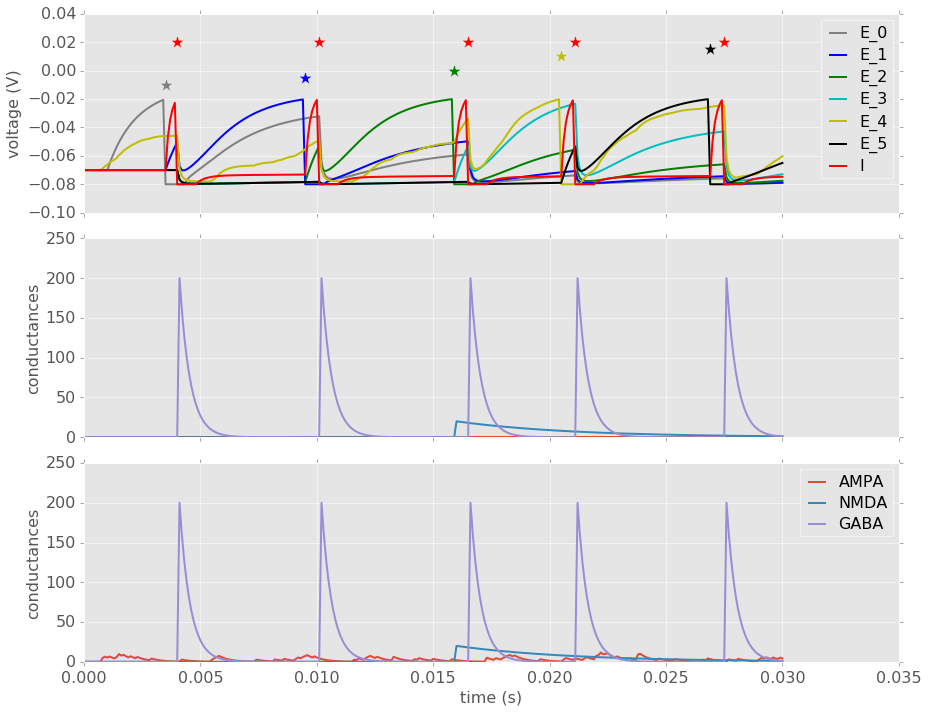

In [7]:
f = fig_s6(
    SEED=0, V_REST=-0.07, TAU_M=0.03, V_TH=-0.02, V_RESET=-0.08, REFRAC_PER=0.001,
    TAUS_SYN={'nmda': 0.005, 'ampa': .0005, 'gaba': 0.0005},
    V_REVS_SYN={'nmda': 0.0, 'ampa': 0.0, 'gaba': -0.08},
    CHAIN_LENGTH=3,
    W_EE={'nmda': 20, 'ampa': 0, 'gaba': 0}, W_EI={'nmda': 0, 'ampa': 0, 'gaba': 200},
    W_IE={'nmda': 0, 'ampa': 100, 'gaba': 0}, W_II={'nmda':0, 'ampa': 0, 'gaba': 100},
    BARRAGE_FREQS={'nmda': 0, 'ampa': 3000, 'gaba': 0},
    BARRAGE_STRENGTHS={'nmda': 0, 'ampa': 2.5, 'gaba': 0},
    DRIVE_STRENGTHS={'nmda': 20, 'ampa': 0, 'gaba': 0},
    DRIVE_TIMES={'nmda': [.001], 'ampa': [], 'gaba': []},
    SIM_DURATION=.03, DT=0.0001,
    FIG_SIZE=(13, 10), FONT_SIZE=16, COLORS=['gray', 'b', 'g', 'c', 'y', 'k', 'r'],
)

### Fig S6: AMPA input barrage modulates which of two downstream neurons emits a spike

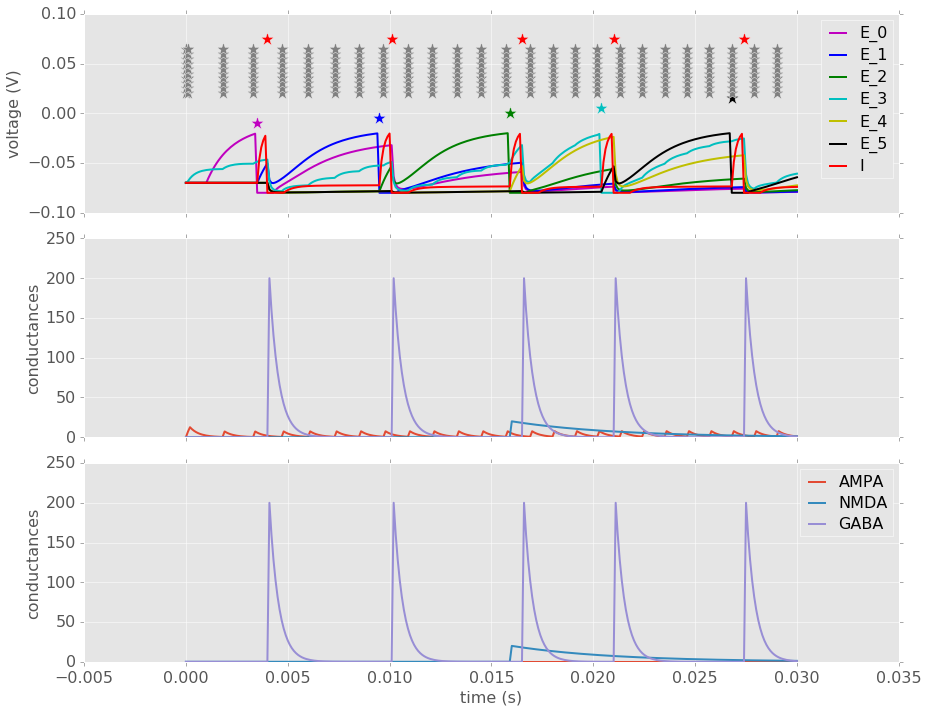

In [18]:
f = fig_s7(
    SEED=0, V_REST=-0.07, TAU_M=0.03, V_TH=-0.02, V_RESET=-0.08, REFRAC_PER=0.001,
    TAUS_SYN={'nmda': 0.005, 'ampa': .0005, 'gaba': 0.0005},
    V_REVS_SYN={'nmda': 0.0, 'ampa': 0.0, 'gaba': -0.08},
    CHAIN_LENGTH=3, N_CELLS_MEMORY=10,
    P_CONNECT_MEMORY={'nmda': .3, 'ampa': 0, 'gaba': 0},
    W_EE={'nmda': 20, 'ampa': 0, 'gaba': 0}, W_EI={'nmda': 0, 'ampa': 0, 'gaba': 200},
    W_IE={'nmda': 0, 'ampa': 100, 'gaba': 0}, W_II={'nmda':0, 'ampa': 0, 'gaba': 10},
    W_EE_MEMORY={'nmda': 3, 'ampa': 0, 'gaba': 0},
    W_MEMORY_OUTPUT={'nmda': 0, 'ampa': .7, 'gaba': 0},
    DRIVE_STRENGTHS={'nmda': 20, 'ampa': 0, 'gaba': 0},
    DRIVE_TIMES={'nmda': [.001], 'ampa': [], 'gaba': []},
    SIM_DURATION=.03, DT=0.0001,
    FIG_SIZE=(13, 10), FONT_SIZE=16, COLORS=['m', 'b', 'g', 'c', 'y', 'k'],
)

### Fig S7: AMPA input barrage by self-sustaining E neuron modulates spiking probability
Here E_3 and E_4 both receive the same input from E_2. However, E_3 also receives a low level barrage of input from a group of reciprocally connected E cells in the self-sustained firing regime. Thus, when E_2 fires, E_3 spikes before E_4 has the chance to, and thus suppresses E_4 from spiking at all.